### What is Polynomial Linear Regression?
 - In Simple Linear Regression, we use a straight line with formula Y = MX + C.
 - It was used to best fit the line to our dataset.
 - But in some datasets, it is hard to fit a straight line. Therefore we use a polynomial function of a curve to fit all the data points.
 - The formula of the polynomial linear regression is almost similar to that of Simple Linear Regression.
$$y = {a+bx + cx^2+...+nx^n+...}$$
                        
<img src='2.jpg'>
- if the dataset look like this type then we are doesnot use Linear Regression

- In this case we are use Polynomial regresion or other Type of regression techinque like (Decision tree,naive Bayes etc)

### Implementation of the polynomial linear regression in Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Position_Salaries.csv'

In [3]:
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
dataset = dataset.drop(['Position'],axis=True)

In [5]:
dataset

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


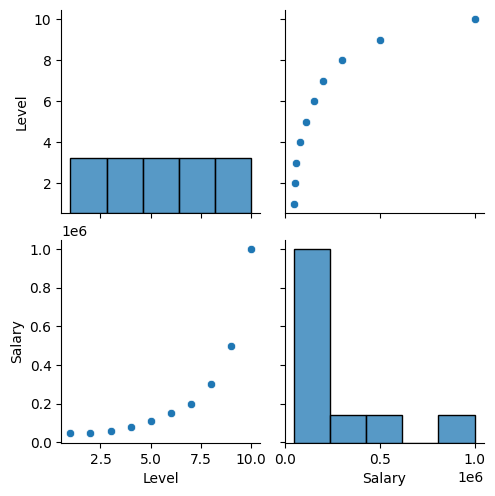

In [7]:
sns.pairplot(dataset)

### As see this plot is not linearly separable so here we use polynomial regression

In [8]:
X = dataset.drop(['Salary'],axis=True)
y = dataset['Salary']

In [9]:
#Now Split The Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8, 1), (2, 1), (8,), (2,))

## ## Training the Linear Regression model 

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

### Accuracy For Linear Regression

In [12]:
print("Training Accuracy :", lin_reg.score(X_train, y_train))
print("Testing Accuracy :", lin_reg.score(X_test, y_test))

Training Accuracy : 0.6366049276570868
Testing Accuracy : 0.8451346684575975


## Training the Polynomial Regression model 

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression()

In [14]:
X_train

,Level
5,6
0,1
7,8
2,3
9,10
4,5
3,4
6,7


In [15]:
X_poly

array([[1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03]])

### Accuracy For Using Polynomial Regression

In [17]:
print("Training Accuracy :", lin_reg_2.score(X_poly, y_train))


Training Accuracy : 0.9995857211026754


 - See in above that when i apply only Linear Regression On this data accuracy is not good, but When i apply polynomial regression then the accuracy is very high.
 ### - So i hope Now you understood when we apply Linear Regression and when we apply Polynomial Regression

### Graph For When We Use Linear Regression

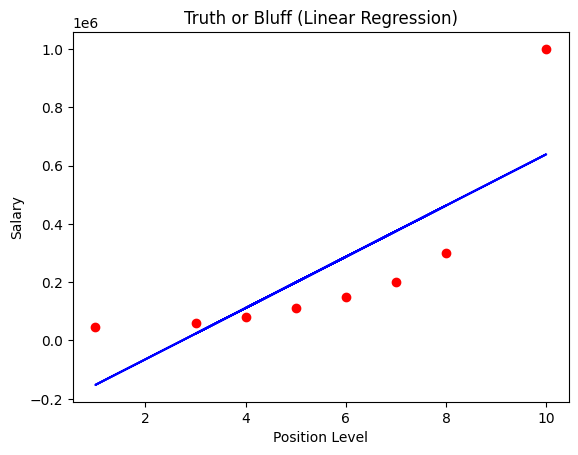

In [18]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Graph For When We Use Polynomial Regression

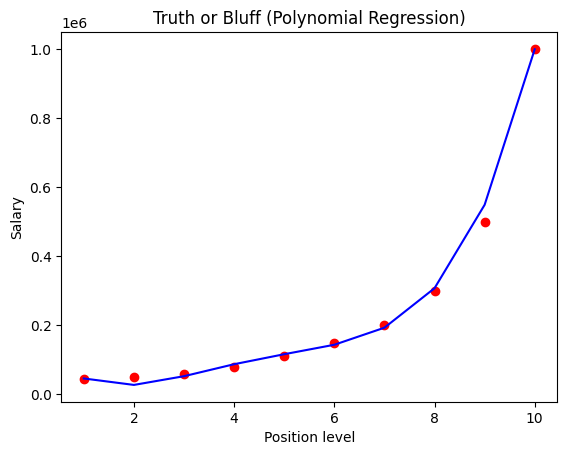

In [19]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()